In [2]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)



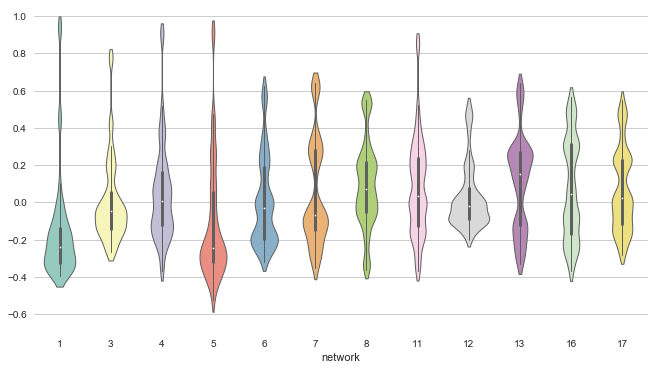

In [3]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

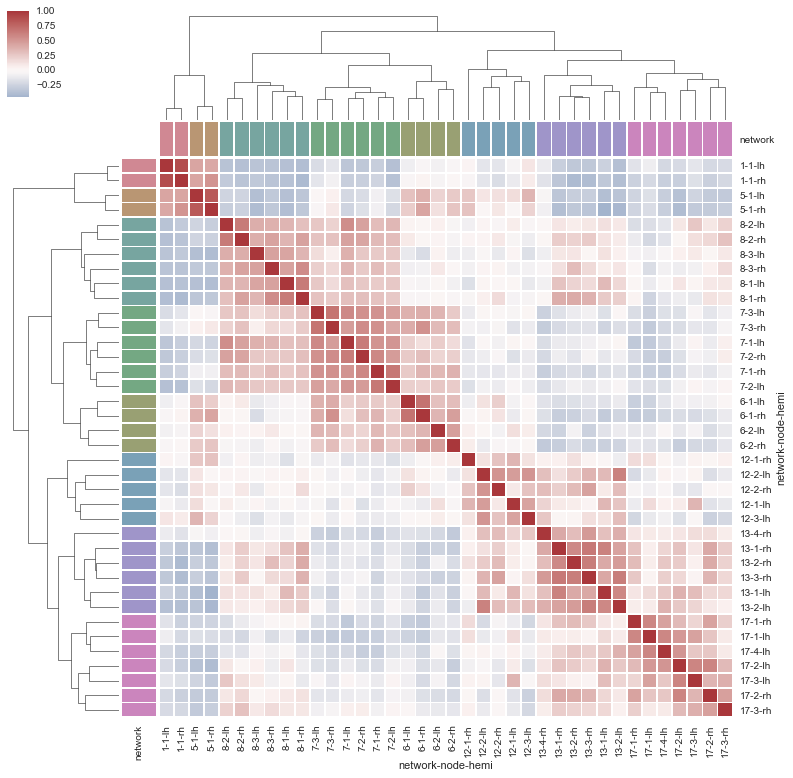

In [4]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

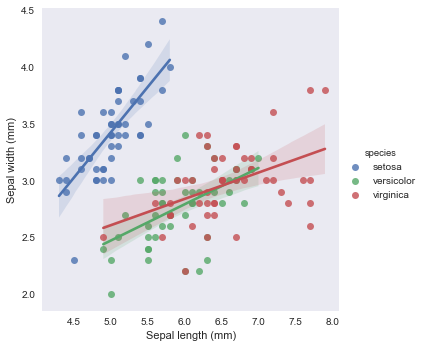

In [5]:
# Load the example tips dataset
iris = sns.load_dataset("iris")

# set a dark background
sns.set(style="dark")
# Plot width as a function of length
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

In [14]:
from sklearn.decomposition import PCA

iris_reduced = PCA(n_components=4).fit_transform(iris[iris.columns[0:4]])

iris_reduced = pd.DataFrame(iris_reduced)
iris_reduced.columns=['E1','E2','E3','E4']
iris_reduced['species']=iris['species']

species = list(set(iris_reduced['species']))

In [15]:
iris_reduced.head()

,E1,E2,E3,E4,species
0,-2.684126,-0.319397,0.027915,0.002262,setosa
1,-2.714142,0.177001,0.210464,0.099027,setosa
2,-2.888991,0.144949,-0.017900,0.019968,setosa
3,-2.745343,0.318299,-0.031559,-0.075576,setosa
4,-2.728717,-0.326755,-0.090079,-0.061259,setosa


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


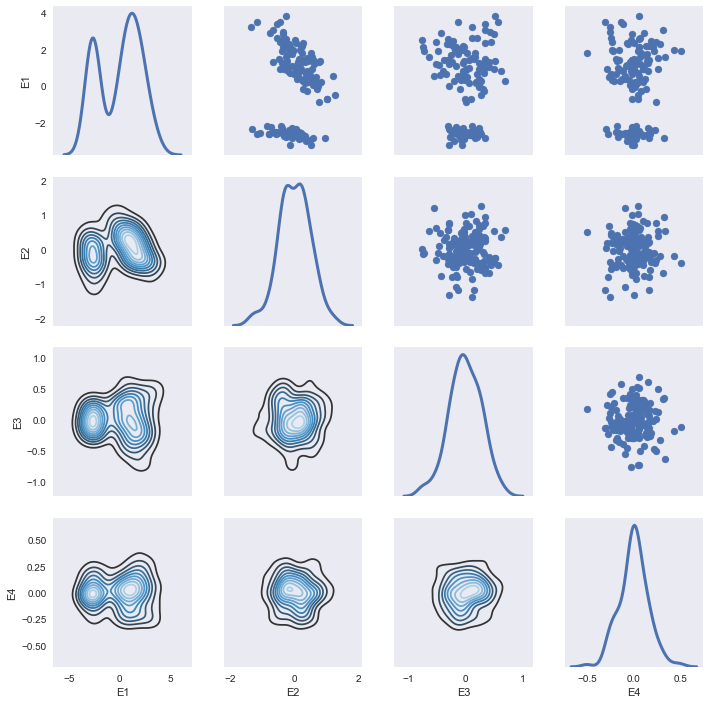

In [16]:
g = sns.PairGrid(iris_reduced, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


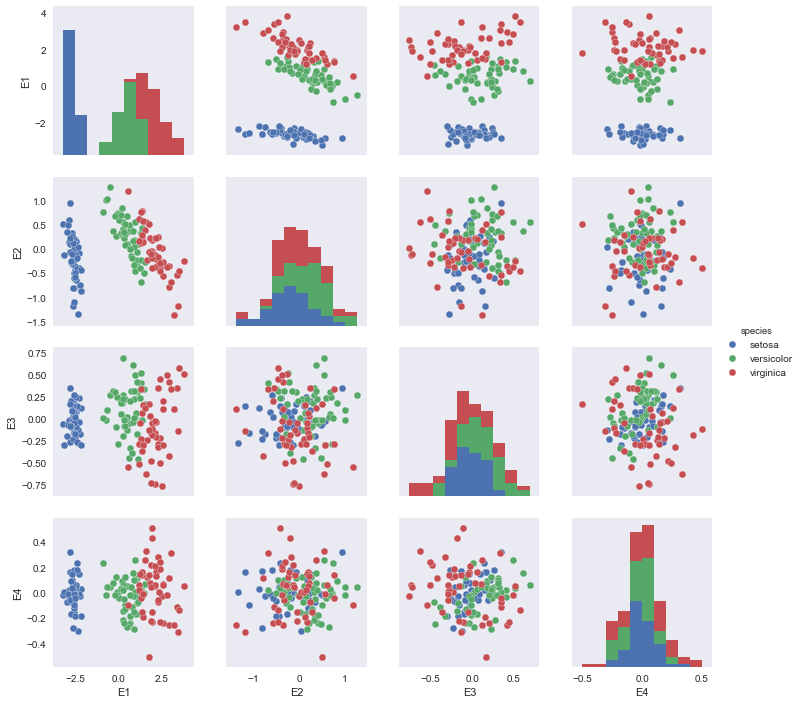

In [17]:
g1 = sns.pairplot(iris_reduced,hue="species")

Dimension Reduction on 4 observations is not really useful



In [41]:
white = pd.read_csv('static/Data/winequality-white.csv',sep=';')
red = pd.read_csv('static/Data/winequality-red.csv',sep=';')
#  add an attribute "Type" so that we can put all the data into one set
white['Type']='White'
red['Type']='Red'

wine = white.append(red, ignore_index=True)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Type'],
      dtype='object')

In [46]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


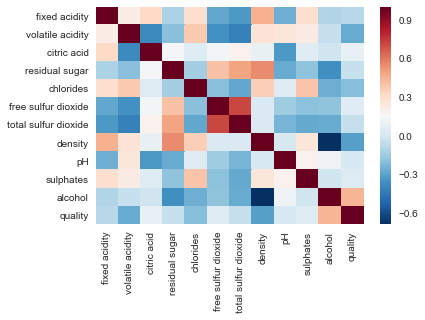

In [66]:
colormap = plt.cm.RdBu_r
ax=sns.heatmap(wine.corr(),cmap=colormap)

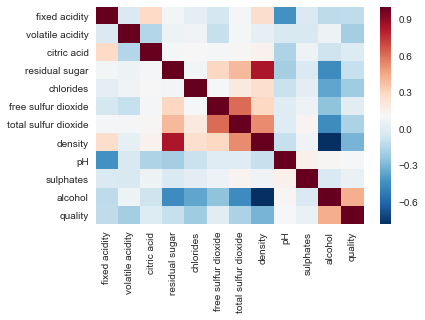

In [67]:
ax=sns.heatmap(wine[wine['Type']=='White'].corr(),cmap=colormap)

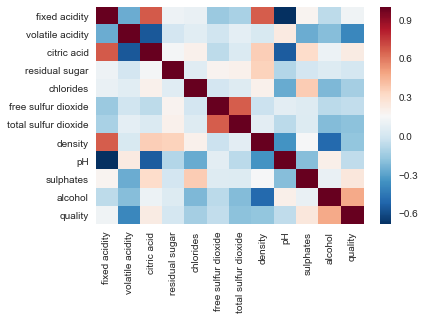

In [68]:
ax=sns.heatmap(wine[wine['Type']=='Red'].corr(),cmap=colormap)

In [79]:
winePC = PCA(n_components=12).fit_transform(wine[wine.columns.difference(['Type'])])
winePC = pd.DataFrame(winePC)
winePC['Type']=wine['Type']


In [80]:
winePC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Type
0,-56.718322,1.805959,-12.980581,0.024407,0.121268,-0.433933,0.061086,-0.053581,-0.062024,0.002017,-0.005410,-0.000532,White
1,-11.848680,-19.902059,3.901399,0.016517,1.148306,-0.964248,0.037431,0.028844,0.048810,-0.054141,-0.008733,-0.000459,White
2,18.288538,3.849399,-2.187961,0.655891,-0.374847,-0.264093,0.072587,-0.011082,0.156178,-0.026911,-0.003129,0.001410,White
3,-72.225970,-0.176139,-0.123628,0.406046,-0.335651,-0.258297,-0.003937,-0.080622,0.090124,0.030174,0.021502,-0.000060,White
4,-72.225970,-0.176139,-0.123628,0.406046,-0.335651,-0.258297,-0.003937,-0.080622,0.090124,0.030174,0.021502,-0.000060,White


In [94]:
import numpy as np
nums = (np.arange(1,13,1))
cols = []
for num in nums:
    cols.append(("E%02d"%num))
    
cols.append('Type')
winePC.columns=cols

,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E11,E12,Type
0,-56.718322,1.805959,-12.980581,0.024407,0.121268,-0.433933,0.061086,-0.053581,-0.062024,0.002017,-0.005410,-0.000532,White
1,-11.848680,-19.902059,3.901399,0.016517,1.148306,-0.964248,0.037431,0.028844,0.048810,-0.054141,-0.008733,-0.000459,White
2,18.288538,3.849399,-2.187961,0.655891,-0.374847,-0.264093,0.072587,-0.011082,0.156178,-0.026911,-0.003129,0.001410,White
3,-72.225970,-0.176139,-0.123628,0.406046,-0.335651,-0.258297,-0.003937,-0.080622,0.090124,0.030174,0.021502,-0.000060,White
4,-72.225970,-0.176139,-0.123628,0.406046,-0.335651,-0.258297,-0.003937,-0.080622,0.090124,0.030174,0.021502,-0.000060,White


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


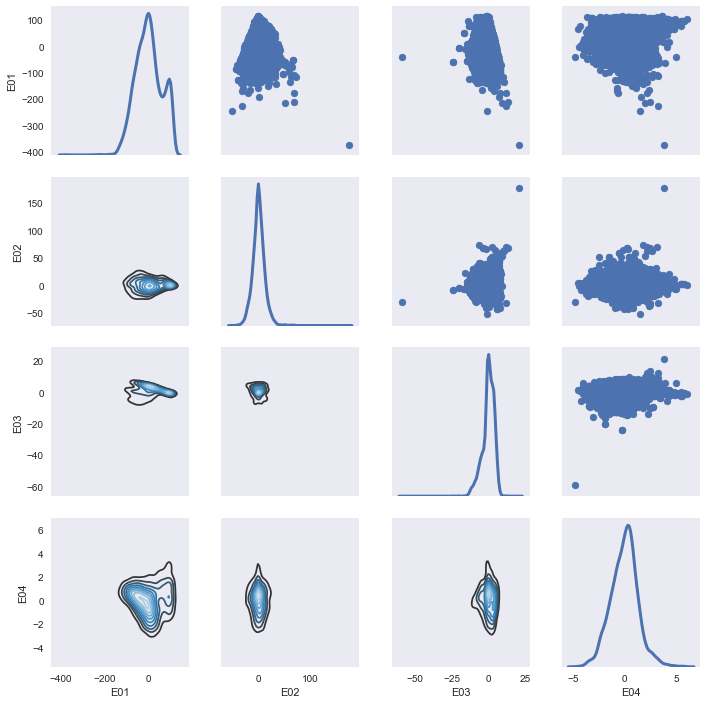

In [99]:
g = sns.PairGrid(winePC.iloc[:,0:4], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

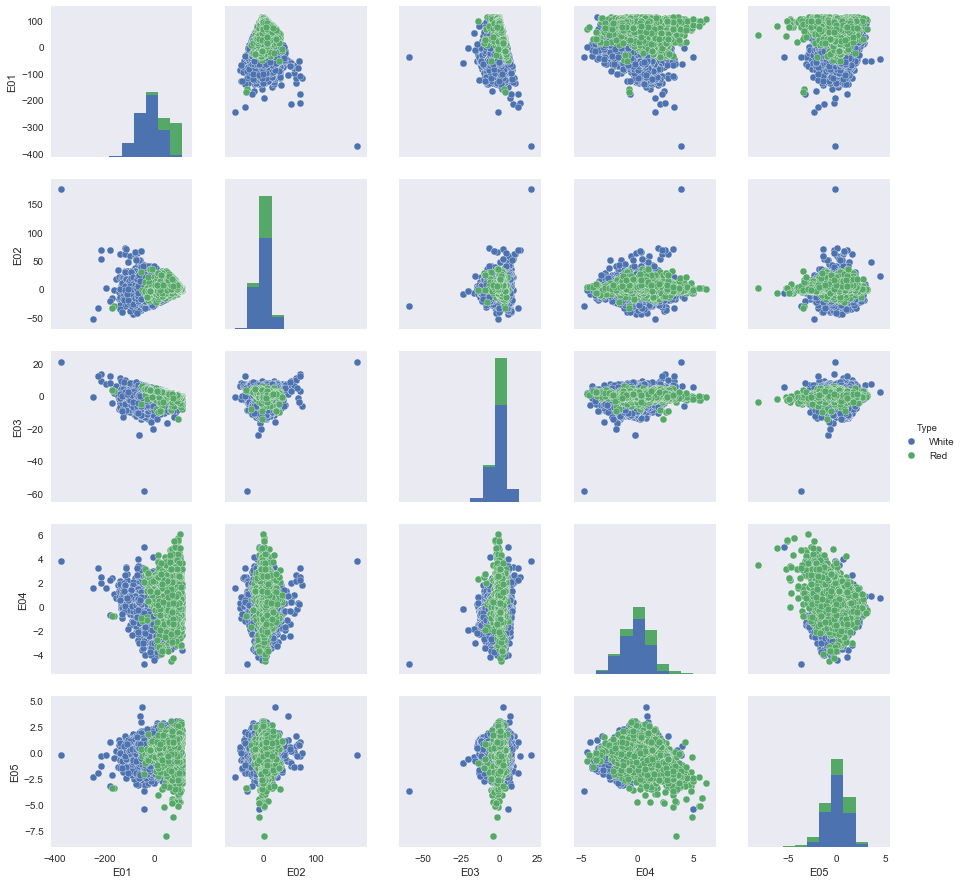

In [114]:
#winePC.iloc[:,[0,1,2,3,4,12]]
g1 = sns.pairplot(winePC.iloc[:,[0,1,2,3,4,12]],hue="Type")